# Car Recommendation System
This notebook explores the car dataset, performs EDA, and builds a simple recommendation system based on user preferences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
file_path = '/content/Car details v3.csv'
car_data = pd.read_csv(file_path)
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Data Cleaning
Convert relevant columns to numeric and handle missing values.

In [3]:

car_data['mileage'] = car_data['mileage'].str.extract('(\d+.\d+)').astype(float)
car_data['engine'] = car_data['engine'].str.extract('(\d+)').astype(float)
car_data['max_power'] = car_data['max_power'].str.extract('(\d+.\d+)').astype(float)
car_data_cleaned = car_data.dropna()
car_data_cleaned['seats'] = car_data_cleaned['seats'].astype(int)
car_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5994 entries, 1 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5994 non-null   object 
 1   year           5994 non-null   int64  
 2   selling_price  5994 non-null   int64  
 3   km_driven      5994 non-null   int64  
 4   fuel           5994 non-null   object 
 5   seller_type    5994 non-null   object 
 6   transmission   5994 non-null   object 
 7   owner          5994 non-null   object 
 8   mileage        5994 non-null   float64
 9   engine         5994 non-null   float64
 10  max_power      5994 non-null   float64
 11  torque         5994 non-null   object 
 12  seats          5994 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 655.6+ KB


<ipython-input-3-7deeb42661c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_cleaned['seats'] = car_data_cleaned['seats'].astype(int)


## Exploratory Data Analysis (EDA)
Visualize key features to understand the data better.

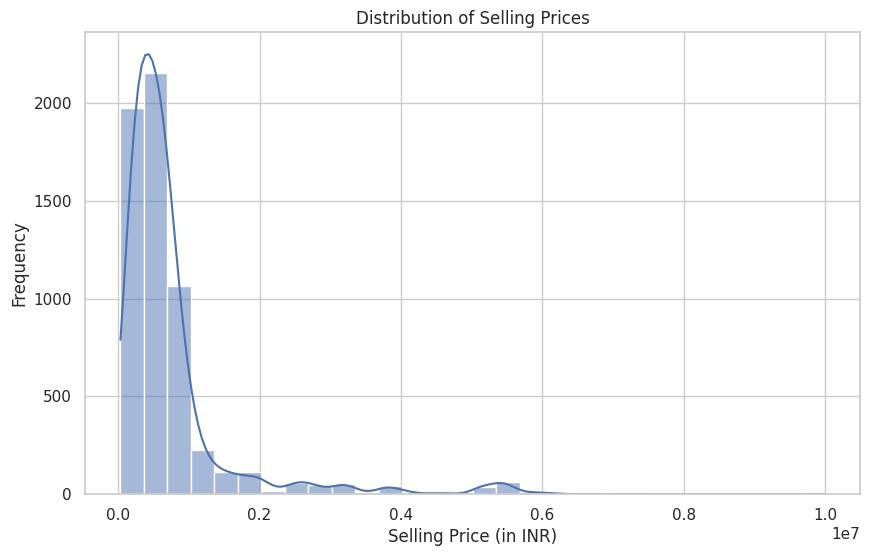

In [4]:

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(car_data_cleaned['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in INR)')
plt.ylabel('Frequency')
plt.show()


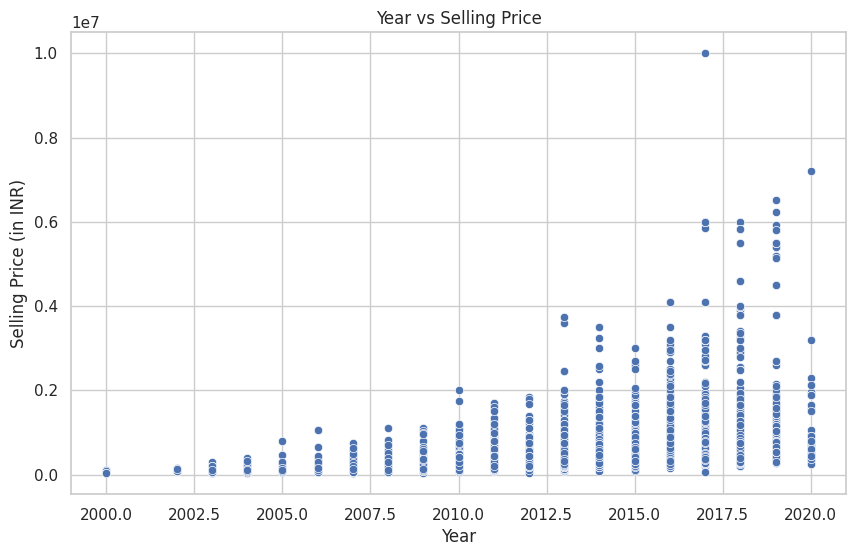

In [5]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=car_data_cleaned)
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (in INR)')
plt.show()


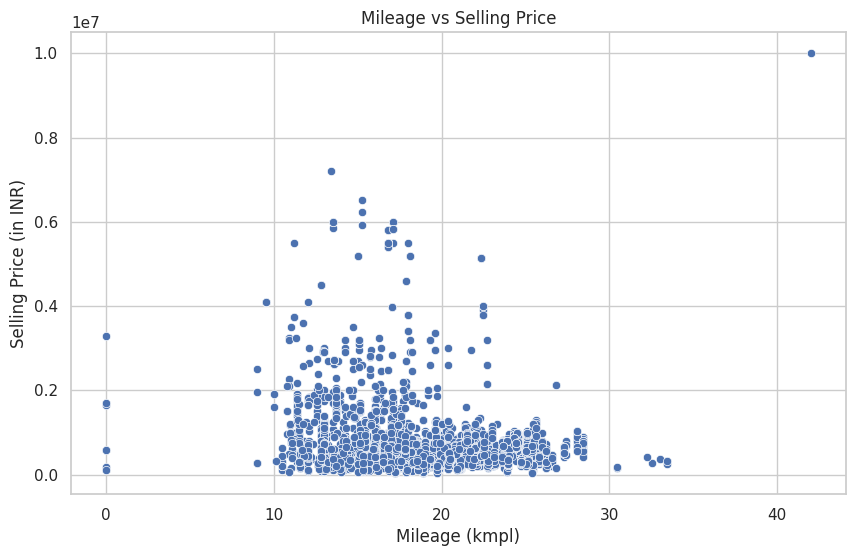

In [6]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='selling_price', data=car_data_cleaned)
plt.title('Mileage vs Selling Price')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Selling Price (in INR)')
plt.show()


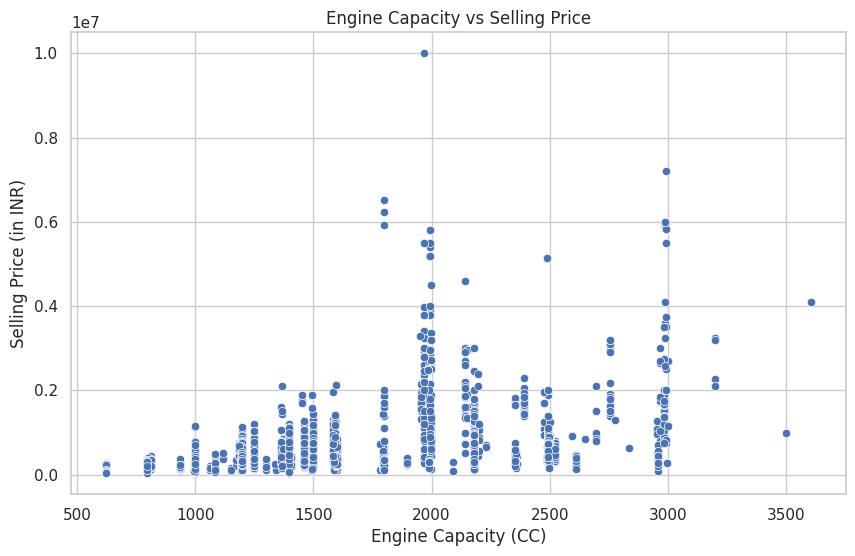

In [7]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine', y='selling_price', data=car_data_cleaned)
plt.title('Engine Capacity vs Selling Price')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Selling Price (in INR)')
plt.show()


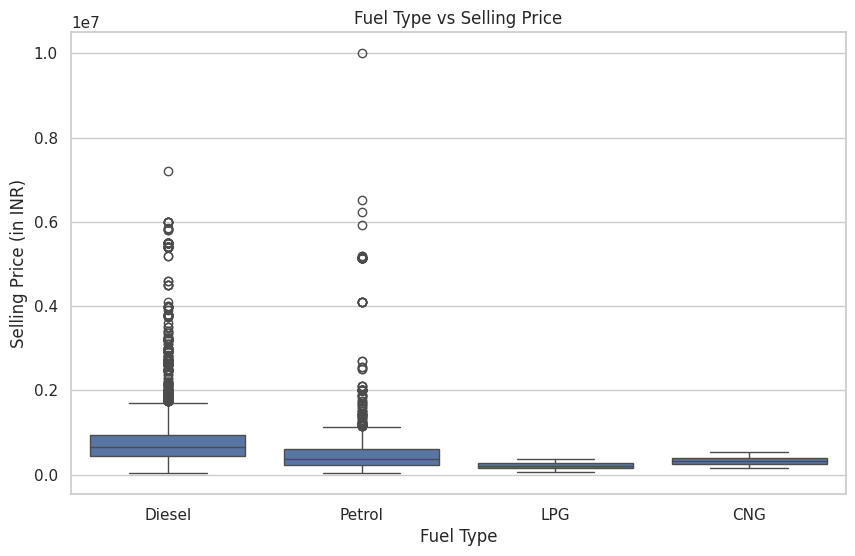

In [9]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=car_data_cleaned)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (in INR)')
plt.show()


## Car Recommendation System
A simple recommendation system based on user-defined preferences.

In [8]:

def recommend_cars(budget, fuel_type=None, transmission=None, min_mileage=None, max_km_driven=None):
    recommendations = car_data_cleaned.copy()
    recommendations = recommendations[recommendations['selling_price'] <= budget]
    if fuel_type:
        recommendations = recommendations[recommendations['fuel'] == fuel_type]
    if transmission:
        recommendations = recommendations[recommendations['transmission'] == transmission]
    if min_mileage:
        recommendations = recommendations[recommendations['mileage'] >= min_mileage]
    if max_km_driven:
        recommendations = recommendations[recommendations['km_driven'] <= max_km_driven]
    return recommendations[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'mileage', 'engine', 'max_power', 'seats']].head(10)

recommend_cars(budget=500000, fuel_type='Petrol', transmission='Manual', min_mileage=15, max_km_driven=80000)


,name,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Manual,20.14,1197.0,81.86,5
18,Maruti Alto LX,2002,150000,80000,Petrol,Manual,19.70,796.0,46.30,5
24,Tata Tigor 2017-2020 XZ,2018,500000,35000,Petrol,Manual,20.30,1199.0,83.81,5
26,Maruti Alto 800 LXI,2017,275000,28000,Petrol,Manual,24.70,796.0,47.30,5
29,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Manual,16.80,796.0,34.20,8
36,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Manual,23.95,998.0,67.10,5
46,Maruti Alto K10 VXI,2018,390000,10300,Petrol,Manual,23.95,998.0,67.05,5
73,Hyundai i10 Magna,2011,235000,60000,Petrol,Manual,20.36,1197.0,78.90,5
83,Maruti Celerio ZXI MT BSIV,2017,484999,10000,Petrol,Manual,23.10,998.0,67.04,5
84,Datsun GO A Petrol,2016,275000,49000,Petrol,Manual,19.02,1198.0,67.05,5
